In [ ]:
%reload_ext autoreload
%autoreload 2

from fastai.vision import *

# Dogs and cats

## Resnet 34

In [ ]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/ubuntu/.fastai/data/dogscats')

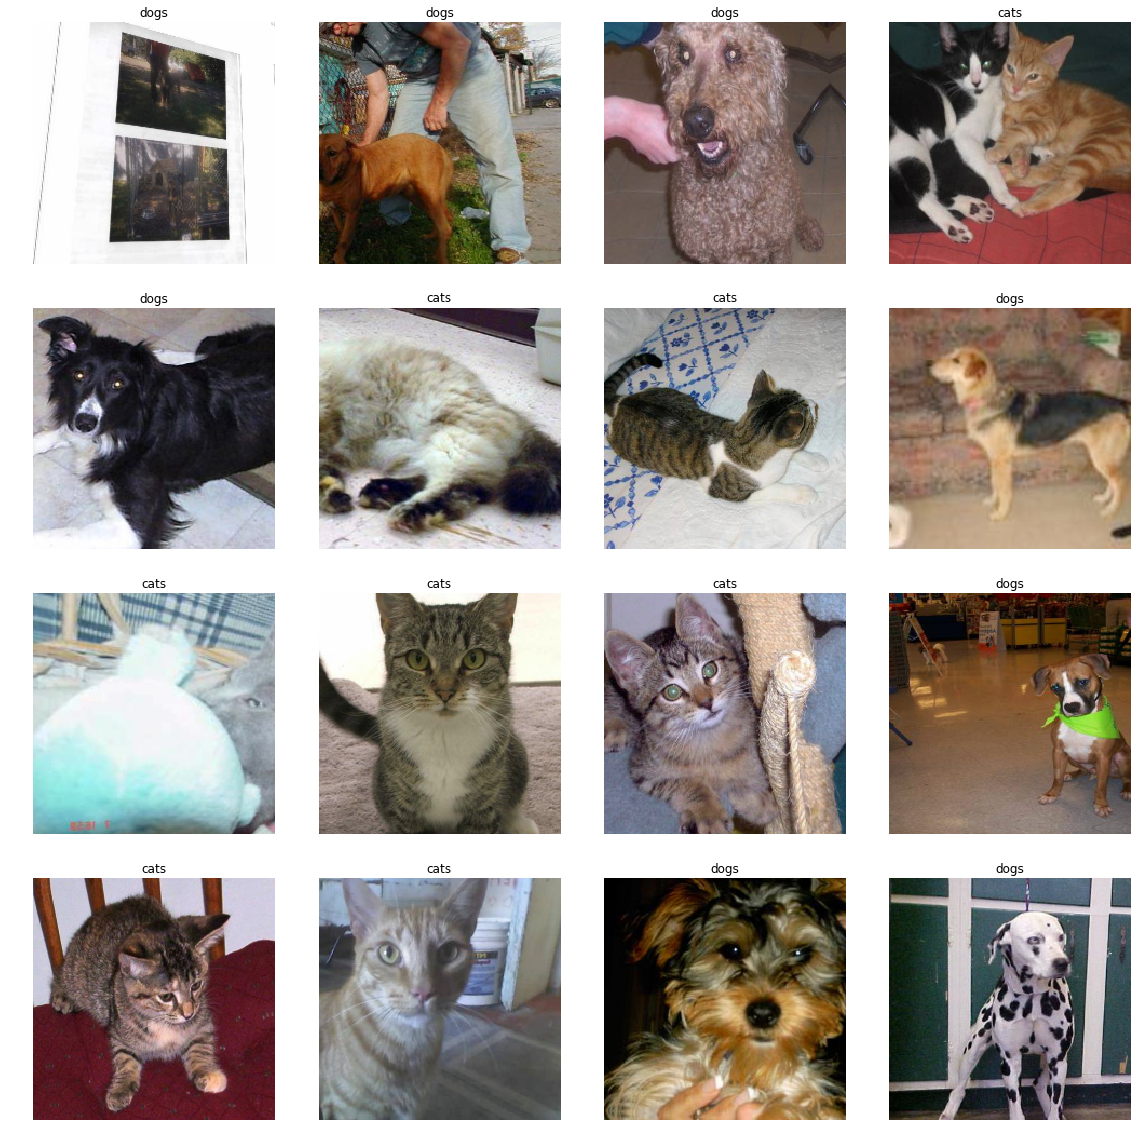

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
data.show_batch(rows=4)

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.052548,0.026411,0.992000


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.048187,0.027477,0.988500
2,0.022563,0.024907,0.990500
3,0.017952,0.017247,0.995000
4,0.016476,0.018968,0.993500
5,0.008154,0.019849,0.992000
6,0.009654,0.018833,0.993500


In [ ]:
accuracy(*learn.TTA())

tensor(0.9945)

## rn50

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.044986,0.028825,0.989000


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy
1,0.040551,0.021553,0.991500
2,0.028230,0.019264,0.992000
3,0.024131,0.023275,0.991500
4,0.010579,0.020088,0.993000
5,0.007140,0.018935,0.993000
6,0.005668,0.019965,0.993000


In [ ]:
accuracy(*learn.TTA())

tensor(0.9940)